In [2]:
# python notebook for Make Your Own Neural Network
# working with the MNIST data set
#
# (c) Tariq Rashid, 2016
# license is GPLv2

In [1]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [2]:
# open the CSV file and read its contents into a list
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [3]:
# check the number of data records (examples)
len(data_list)

100

In [4]:
# show a dataset record
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
data_list[2]

'4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0,0,0,0,46,245,163,0,0,0,0,0,0,0,0,0,0,0,0,0,198,254,56,0,0,0,0,0,0,0,0,0,120,254,163,0,0,0,0,0,0,0,0,0,0,0,0,23,231,254,29,0,0,0,0,0,0,0,0,0,159,254,120,0,0,0,0,0,0,0,0,0,0,0,0,163,254,216,16,0,0,0,0,0,0,0,0,0,159,254,67,0,0,0,0,0,0,0,0,0,14,86,178,248,254,91,0,0,0,0,0,0,0,0,0,0,159,254,85,0,0,0,47,49,116,144,150,241,243,234,179,241,252,40,0,0,0,0,0,0,0,0,0,0,150,253,237,207,207,207,253,254,250,2

['4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '67', '232', '39', '0', '0', '0', '0', '0', '0', '0', '0', '0', '62', '81', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '120', '180', '39', '0', '0', '0', '0', '0', '0'

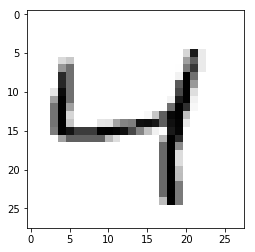

In [5]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
all_values = data_list[2].split(',')
print(all_values)
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [6]:
# scale input to range 0.01 to 1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [7]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01 #alle Targets auf "Null" setzen
targets[int(all_values[0])] = 0.99 #das für die sentsprechende Zahl auf "eins"

In [8]:
print(targets)

[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]
